# ライブラリのインポート

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

# 関数定義

In [2]:
# デバッグ用関数
def DEBUG_PRINT(text, value):
    print("※※※ " + text + " ※※※")
    print(value)
    print("")

# 正規化用関数
def normalize_cols(m):
    col_max = m.max(axis=0)
    col_min = m.min(axis=0)
    return (m-col_min) / (col_max - col_min)

# ネットワーク定義

In [3]:
# 重み初期値補正係数
wieght_init = 0.3

# 入力層ユニット数
input_layer_size = 3

# 中間層ユニット数
hidden_layer_size = 10

# 出力層ユニット数
output_layer_size = 1

# 初期設定
def init_network():
    
    network = {} 
    
    network['W2'] = wieght_init * np.random.randn(input_layer_size, hidden_layer_size)
    # DEBUG_PRINT("重み2 [W2]", network['W2'])
    
    network['W3'] = wieght_init * np.random.randn(hidden_layer_size, output_layer_size)
    # DEBUG_PRINT("重み3 [W3]", network['W3'])
    
    network['b2'] = np.zeros(hidden_layer_size)
    # DEBUG_PRINT("バイアス2 [b2]", network['b2'])
    
    network['b3'] = np.zeros(output_layer_size)
    # DEBUG_PRINT("バイアス3 [b3]", network['b3'])
   
    return network

# 順伝播
def forward(network, x):
    
    W2, W3 = network['W2'], network['W3']
    b2, b3 = network['b2'], network['b3']
    
    # 入力値のコピー
    # DEBUG_PRINT("入力値 [x]", x)
    z1 = x
    # DEBUG_PRINT("入力値 [z1]", z1)
        
    # 順伝播開始
    u2 =  np.dot(z1, W2) + b2
    # DEBUG_PRINT("中間層2層入力値 [u2]", u2)
   
    z2 = relu(u2)
    # DEBUG_PRINT("中間層2層出力値 [z2]", z2)
    
    u3 =  np.dot(z2, W3) + b3
    # DEBUG_PRINT("出力層3層入力値 [u3]", u3)
   
    # 恒等写像
    z3 = u3
    
    # 出力値のコピー
    y = z3
    # DEBUG_PRINT("出力層3層出力値 [y]", y)
    
    return z1, z2, y

# 誤差逆伝播
def backward(z1, z2, y, d):
    
    # ミニバッチのデータ数
    batch_size = d.shape[0]
    #batch_size = 1
    # DEBUG_PRINT("ミニバッチのデータ数", batch_size)
    
    grad = {}
    
    W2, W3 = network['W2'], network['W3']
    b2, b3 = network['b2'], network['b3']    
    
    # 出力層でのデルタ
    delta3 = d_least_square(y, d)
    # DEBUG_PRINT("出力層でのデルタ", delta3)

    # b3 の勾配
    grad['b3'] = np.sum(delta3, axis=0)/batch_size
    # DEBUG_PRINT("b3 の勾配", grad['b3'])
    
    # W3 の勾配
    grad['W3'] = np.dot(z2.T, delta3)/batch_size
    # DEBUG_PRINT("W3 の勾配", grad['W3'])
    
    # 2層でのデルタ
    delta2 = np.dot(delta3, W3.T) * d_relu(z2)
    # DEBUG_PRINT("2層でのデルタ", delta2)
    
    # b2 の勾配
    grad['b2'] = np.sum(delta2, axis=0)/batch_size
    # DEBUG_PRINT("b2 の勾配", grad['b2'])  
    
    # W2 の勾配
    grad['W2'] = np.dot(z1.T, delta2)/batch_size
    # DEBUG_PRINT("W2 の勾配", grad['W2'])  

    return grad

# 活性化関数、誤差関数

In [4]:
# 中間層の活性化関数

# ReLU関数
def relu(x):
    return np.maximum(0, x)

# 出力層の活性化関数

# 恒等写像であるため定義なし

# 出力層の活性化関数のデルタ

# 恒等写像のデルタ
def d_least_square(y, d):
    return y - d # ここでは、バッチサイズで除算しない。勾配を算出するタイミングで除算する。

# 導関数

# ReLU 関数
def d_relu(x):
    return np.where( x > 0, 1, 0)

# 誤差関数

# 最小二乗法
def least_square(d, y):
    return np.sum(np.square(d - y)) / 2

# その他、事前準備

In [5]:
# 乱数準備
np.random.seed(1)

# データの準備

In [6]:
# データセットのロード
iris = datasets.load_iris()

# Pandas のデータフレームとして表示
# sepal length (cm) : がく片の長さ
# sepal width (cm) : がく片の幅
# petal length (cm) : 花弁の長さ
# petal width (cm) : 花弁の幅 ⇒ 目的変数
# pd.DataFrame(iris.data, columns=iris.feature_names)

In [7]:
# 説明変数
x_vals = np.array([x[0:3] for x in iris.data])
# DEBUG_PRINT("説明変数", x_vals)

# 目的変数
y_vals = np.array([x[3] for x in iris.data])
y_vals = np.transpose([y_vals])
# DEBUG_PRINT("目的変数", y_vals)
# x_vals_train, x_vals_test, y_vals_train, y_vals_test = train_test_split(x_vals, y_vals, test_size=0.2, random_state=0,)

In [8]:
# ８割のデータをトレーニングセットに設定
train_indices = np.random.choice(len(x_vals), round(len(x_vals)*0.8), replace=False)

# 残りのデータをテストセットに設定
test_indices = np.array(list(set(range(len(x_vals))) - set(train_indices)))

In [9]:
# トレーニングデータ
x_vals_train = x_vals[train_indices]
# DEBUG_PRINT("トレーニングデータ [x_vals_train]", x_vals_train)

y_vals_train = y_vals[train_indices]
# DEBUG_PRINT("トレーニングデータ [y_vals_train]", y_vals_train)

In [10]:
# テストデータ
x_vals_test = x_vals[test_indices]
# DEBUG_PRINT("トレーニングデータ [x_vals_test]", x_vals_test)
y_vals_test = y_vals[test_indices]
# DEBUG_PRINT("トレーニングデータ [y_vals_test]", y_vals_test)

In [11]:
# 正規化と欠損値処理
#x_vals_train = np.nan_to_num(normalize_cols(x_vals_train))
# DEBUG_PRINT("トレーニングデータ [x_vals_train]", x_vals_train)
#x_vals_test = np.nan_to_num(normalize_cols(x_vals_test))
# DEBUG_PRINT("トレーニングデータ [x_vals_test]", x_vals_test)

# トレーニング

Generation: 100. 最小二乗誤差（トレーニング）= 3.6843864469300325
                   : 100. 最小二乗誤差（テスト）= 2.7764140982214833
Generation: 200. 最小二乗誤差（トレーニング）= 2.4781097089041415
                   : 200. 最小二乗誤差（テスト）= 2.2647669407121316
Generation: 300. 最小二乗誤差（トレーニング）= 2.105714694225872
                   : 300. 最小二乗誤差（テスト）= 1.7034549866276723
Generation: 400. 最小二乗誤差（トレーニング）= 1.1325161219897188
                   : 400. 最小二乗誤差（テスト）= 1.4301703086364617
Generation: 500. 最小二乗誤差（トレーニング）= 0.9686121609194753
                   : 500. 最小二乗誤差（テスト）= 1.1848308003237376
Generation: 600. 最小二乗誤差（トレーニング）= 1.0769590909884017
                   : 600. 最小二乗誤差（テスト）= 1.0787818392074668
Generation: 700. 最小二乗誤差（トレーニング）= 1.1189439828758396
                   : 700. 最小二乗誤差（テスト）= 0.9618446496126969
Generation: 800. 最小二乗誤差（トレーニング）= 0.7933383295334381
                   : 800. 最小二乗誤差（テスト）= 0.9396689579265876
Generation: 900. 最小二乗誤差（トレーニング）= 0.9460733484816792
                   : 900. 最小二乗誤差（テスト）= 0.8888225612435644
Generation:

                   : 9200. 最小二乗誤差（テスト）= 0.628152753765103
Generation: 9300. 最小二乗誤差（トレーニング）= 0.8863087050858842
                   : 9300. 最小二乗誤差（テスト）= 0.6270755701241282
Generation: 9400. 最小二乗誤差（トレーニング）= 0.45228378279080533
                   : 9400. 最小二乗誤差（テスト）= 0.6341234001223545
Generation: 9500. 最小二乗誤差（トレーニング）= 0.30290812793641386
                   : 9500. 最小二乗誤差（テスト）= 0.6533324499108977
Generation: 9600. 最小二乗誤差（トレーニング）= 0.4357725957687318
                   : 9600. 最小二乗誤差（テスト）= 0.6633545507771275
Generation: 9700. 最小二乗誤差（トレーニング）= 0.5176088219084923
                   : 9700. 最小二乗誤差（テスト）= 0.6490903378628069
Generation: 9800. 最小二乗誤差（トレーニング）= 0.4131012824574393
                   : 9800. 最小二乗誤差（テスト）= 0.6448847585030838
Generation: 9900. 最小二乗誤差（トレーニング）= 0.6268143075871955
                   : 9900. 最小二乗誤差（テスト）= 0.6203182523813425
Generation: 10000. 最小二乗誤差（トレーニング）= 0.45708016272234064
                   : 10000. 最小二乗誤差（テスト）= 0.6399550365062521


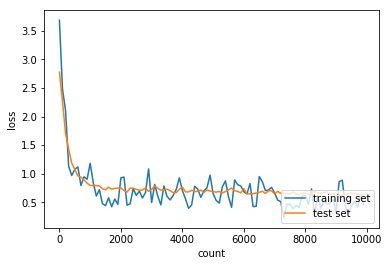

In [12]:
# パラメータの初期化

network = init_network()

ls_train = []
ls_test = []

batch_size = 30 # バッチサイズ
epoch = 10000 #学習回数
learning_rate = 0.001 # 学習率

plot_interval=100 # 描写頻度

# 学習
for i in range(epoch):
    
    # ランダムにバッチを取得    
    batch_mask = np.random.choice(len(x_vals_train), size=batch_size)
    
    # ミニバッチに対応する教師訓練データを取得    
    x_batch = x_vals_train[batch_mask]
    
    # ミニバッチに対応する訓練正解データを取得する
    d_batch = y_vals_train[batch_mask]

    # 順伝播
    z1, z2, y = forward(network, x_batch) # z1とx_batchは同じ
    
    # 誤差逆伝播
    grad = backward(z1, z2, y, d_batch)
    
    # パラメータに勾配適用
    for key in ('W2', 'W3', 'b2', 'b3'):
        network[key]  -= learning_rate * grad[key]

    # 誤差を記録
    if (i+1)%plot_interval==0:
        
        # トレーニングデータの誤差
        z1, z2, d_batch_pred = forward(network, x_batch)
        ls_train_temp = least_square(d_batch, d_batch_pred)
        ls_train.append(ls_train_temp)
        print('Generation: ' + str(i+1) + '. 最小二乗誤差（トレーニング）= ' + str(ls_train_temp))      
        
        # テストデータの誤差
        z1, z2, y_vals_test_pred = forward(network, x_vals_test)
        ls_test_temp = least_square(y_vals_test, y_vals_test_pred)
        ls_test.append(ls_test_temp)
        print('                   : ' + str(i+1) + '. 最小二乗誤差（テスト）= ' + str(ls_test_temp))

lists = range(0, epoch, plot_interval)
plt.plot(lists, ls_train, label="training set")
plt.plot(lists, ls_test,  label="test set")
plt.legend(loc="lower right")
plt.xlabel("count")
plt.ylabel("loss")
# グラフの表示
plt.show()